In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data=pd.read_csv("005380.KS.csv",index_col='Date',parse_dates=True)

In [8]:
stocks=pd.DataFrame(data)
stocks.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,147500.0,148000.0,143500.0,144000.0,116768.585938,445332
2016-01-05,143000.0,145000.0,142000.0,143500.0,116363.156250,530496
2016-01-06,144000.0,145000.0,139000.0,140000.0,113525.054688,769406
2016-01-07,138500.0,140000.0,137500.0,137500.0,111497.796875,586187
2016-01-08,134500.0,138000.0,133500.0,136500.0,110686.898438,888701
2016-01-11,134500.0,140500.0,134000.0,140000.0,113525.054688,542749
2016-01-12,140500.0,141500.0,139000.0,139500.0,113119.593750,386506
2016-01-13,140500.0,141500.0,139500.0,140500.0,113930.476562,338336
2016-01-14,138500.0,143500.0,136500.0,141000.0,114335.937500,664829


In [9]:
stocks.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
stocks.shape

(1958, 6)

In [11]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1958 entries, 2016-01-04 to 2023-12-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1958 non-null   float64
 1   High       1958 non-null   float64
 2   Low        1958 non-null   float64
 3   Close      1958 non-null   float64
 4   Adj Close  1958 non-null   float64
 5   Volume     1958 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 107.1 KB


In [12]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1.958000e+03
mean,159790.551583,161800.051073,157820.173647,159879.315628,144838.117243,8.398524e+05
std,36554.274717,36897.033945,36101.310303,36253.728103,38924.269661,9.545455e+05
min,0.000000,0.000000,0.000000,65900.000000,60204.105469,0.000000e+00
25%,132500.000000,134000.000000,131000.000000,132500.000000,112403.986328,4.172068e+05
50%,153500.000000,155500.000000,152000.000000,154000.000000,130534.453125,5.783490e+05
75%,185500.000000,186975.000000,183500.000000,185475.000000,178103.578125,8.965325e+05
max,271000.000000,289000.000000,259500.000000,267500.000000,248310.390625,1.993370e+07


# Lets plot date vs closing price and see what it looks like

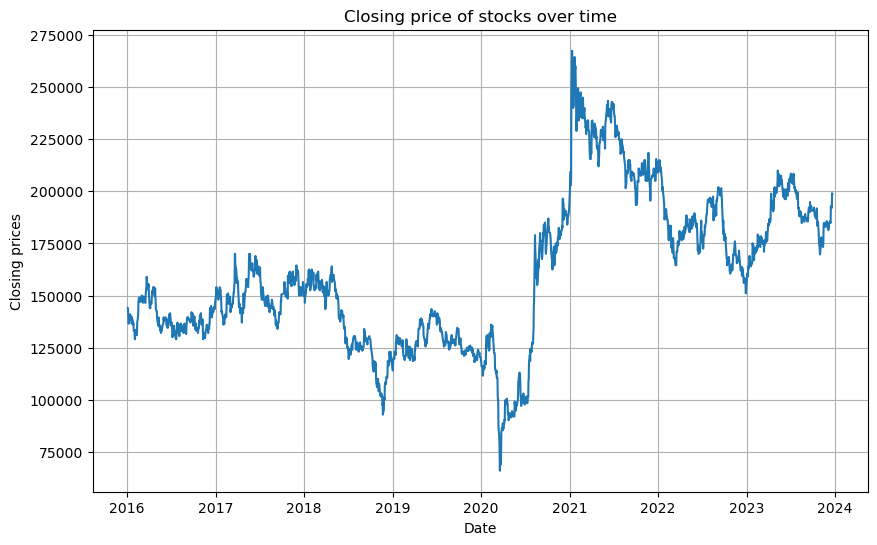

In [13]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Closing prices")
plt.title("Closing price of stocks over time")
plt.plot(stocks['Close'])
plt.show()

## Inference: It is very clear that the data is not stationary(Average closing price and its variance keeps on changing)

Text(0.5, 1.0, 'The Distribution of Closing price')

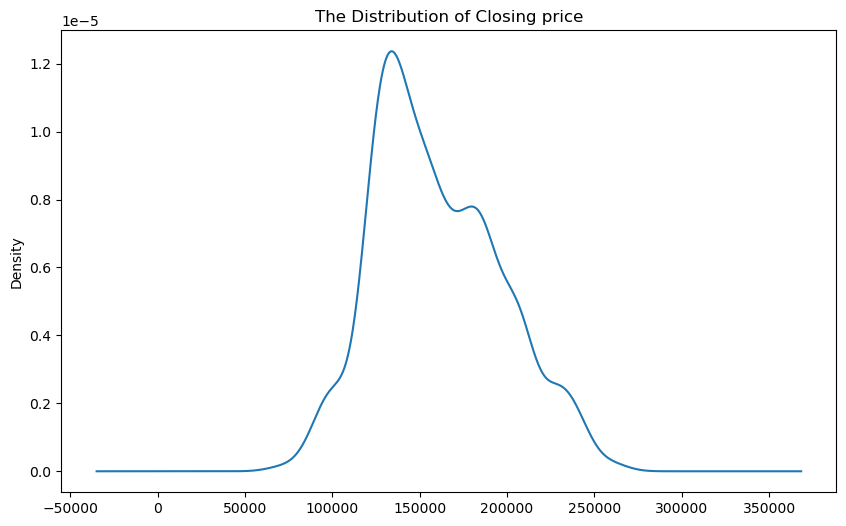

In [14]:
plt.figure(figsize=(10,6))
stocks['Close'].plot(kind='kde')
plt.title("The Distribution of Closing price")

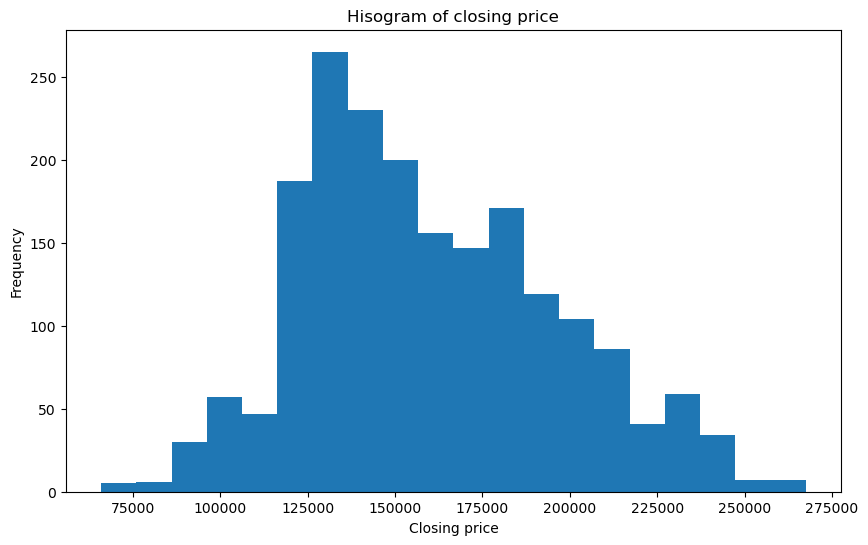

In [15]:
plt.figure(figsize=(10,6))
stocks['Close'].plot(style='k.', kind='hist', bins=20)
plt.title('Hisogram of closing price')
plt.xlabel("Closing price")
plt.ylabel("Frequency")
plt.show()

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


C:\Users\hamsa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


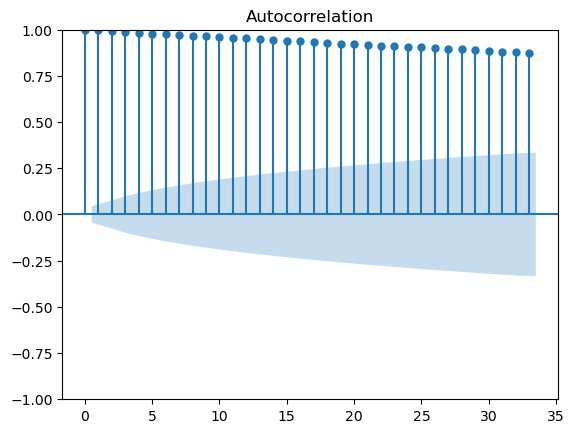

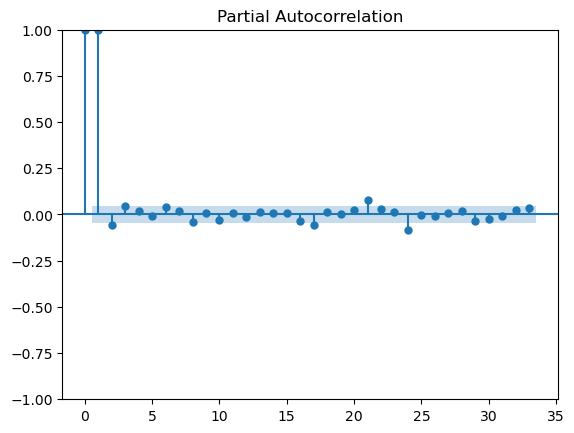

In [17]:
acf=plot_acf(stocks['Close'])
pacf=plot_pacf(stocks['Close'])

# Plotting the rolling mean and std dev

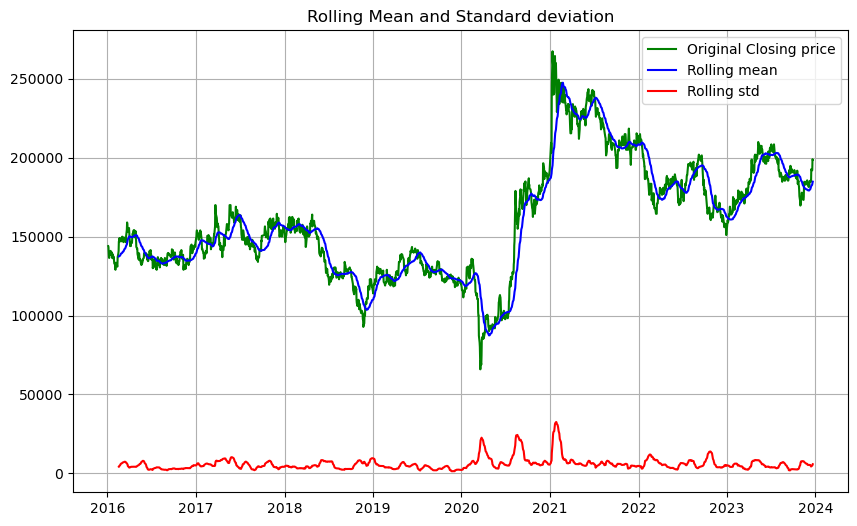

In [18]:
roll_mean=stocks['Close'].rolling(30).mean()
roll_std_dev=stocks['Close'].rolling(30).std()
plt.figure(figsize=(10,6))
plt.plot(stocks['Close'], color='green',label='Original Closing price')
plt.plot(roll_mean, color='blue',label='Rolling mean')
plt.plot(roll_std_dev, color='red',label='Rolling std')
plt.grid(True)
plt.legend(loc='best')
plt.title("Rolling Mean and Standard deviation")
plt.show()

## Inference: The moving average, std dev keeps changing.So,the data is non stationary. Let's conduct a hypothesis test(ADF test) to support our claim.

In [19]:
from statsmodels.tsa.stattools import adfuller
def ADF_Test(close):
    res=adfuller(close,autolag='AIC')
    print("ADF Test Statistics: ",res[0])
    print("P-value: ",res[1])
    print("Number of lags: ",res[2])
    print("Number of observations: ",res[3])
    for percent, val in res[4].items():
        print("Critical value",percent,":",val)
ADF_Test(stocks['Close'])

ADF Test Statistics:  -1.7936069043303238
P-value:  0.3836402757971018
Number of lags:  23
Number of observations:  1934
Critical value 1% : -3.433735729398985
Critical value 5% : -2.8630356049379273
Critical value 10% : -2.5675662008429145


### Conclusions of ADF Test: p value is higher than 0.05 and test statistics is higher than critical values, hence the data is Non stationary

<Figure size 640x480 with 0 Axes>

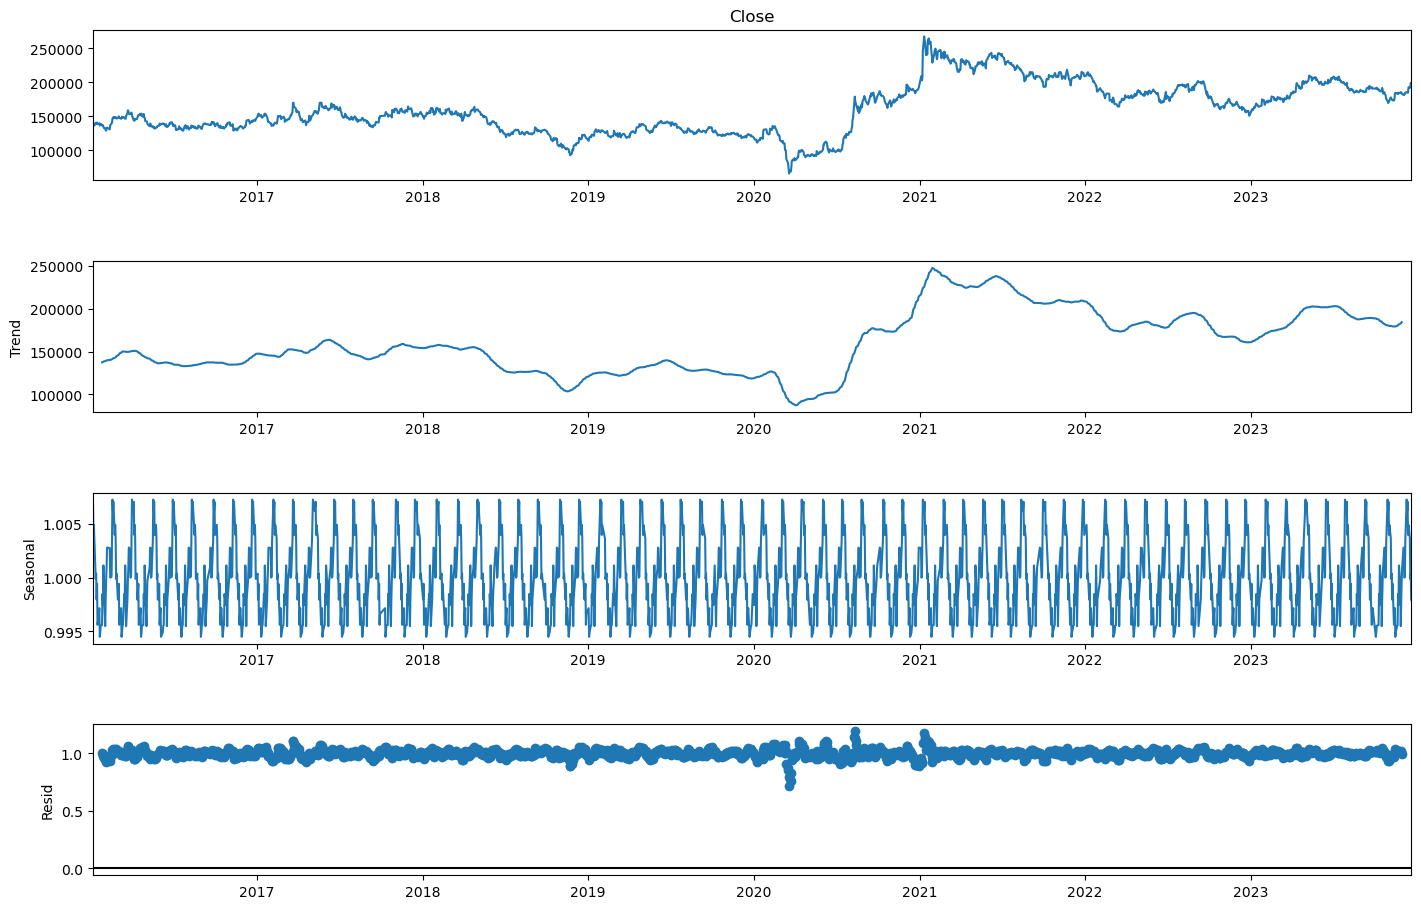

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stocks['Close'], model='multiplicative', period = 30)
graph = plt.figure()  
graph = result.plot()  
graph.set_size_inches(16, 10)

## Inference: There are fluctuations and seasonality in the data. It must be removed to make the data stationary

### We take log values of all the closing prices, to stabilize the variance and mean, making the data stationary.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


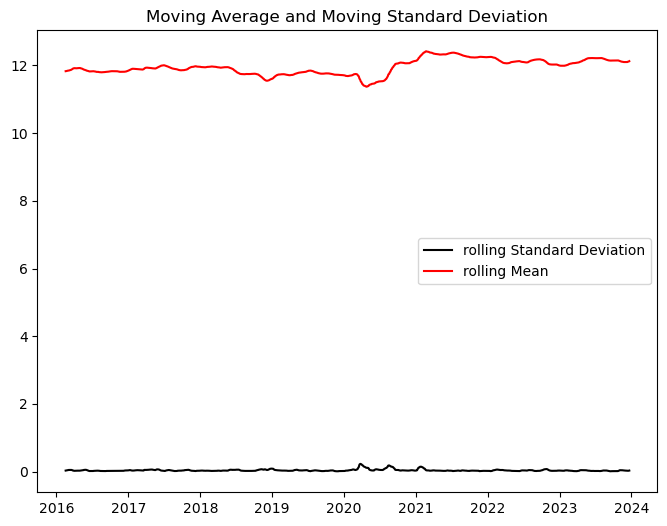

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
log_val = np.log(stocks['Close'])
moving_avg = log_val.rolling(30).mean()
std_dev = log_val.rolling(30).std()
plt.legend(loc='best')
plt.title('Moving Average and Moving Standard Deviation')
plt.plot(std_dev, color ="black", label = "rolling Standard Deviation")
plt.plot(moving_avg, color="red", label = "rolling Mean")
plt.legend()
plt.show()


### Inference: It has become a flat line, indicating "stationarity".

C:\Users\hamsa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


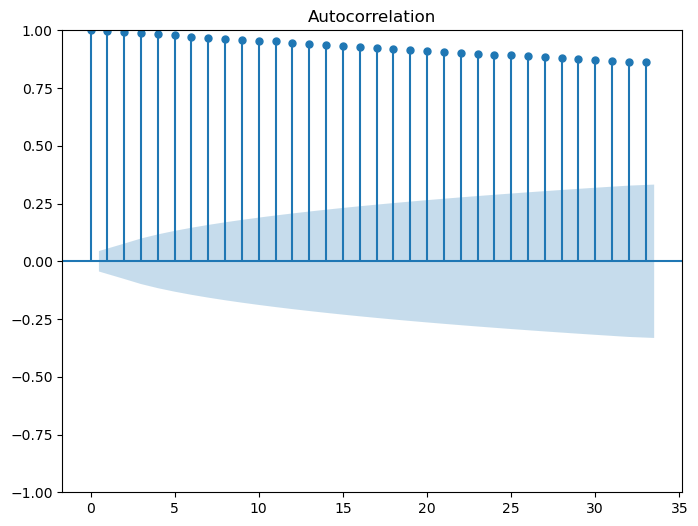

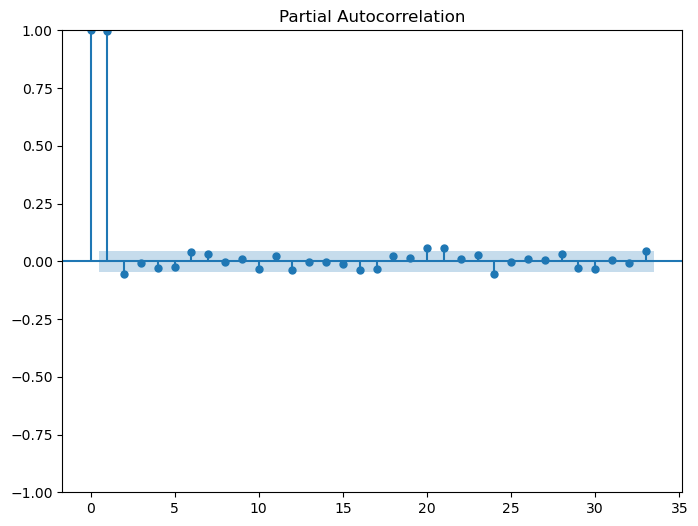

In [22]:
acf=plot_acf(log_val)
pacf=plot_pacf(log_val)

In [23]:
ADF_Test(log_val)

ADF Test Statistics:  -1.8879113639039835
P-value:  0.3377691815093829
Number of lags:  1
Number of observations:  1956
Critical value 1% : -3.4336975984464764
Critical value 5% : -2.8630187704944223
Critical value 10% : -2.567557237266907


### Inference: The p-value of ADF test is still higher than 0.05, so the log transformed values are still non stationary

#### Diferencing the log transformed values

In [29]:
diff_val=log_val.diff().dropna()

C:\Users\hamsa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


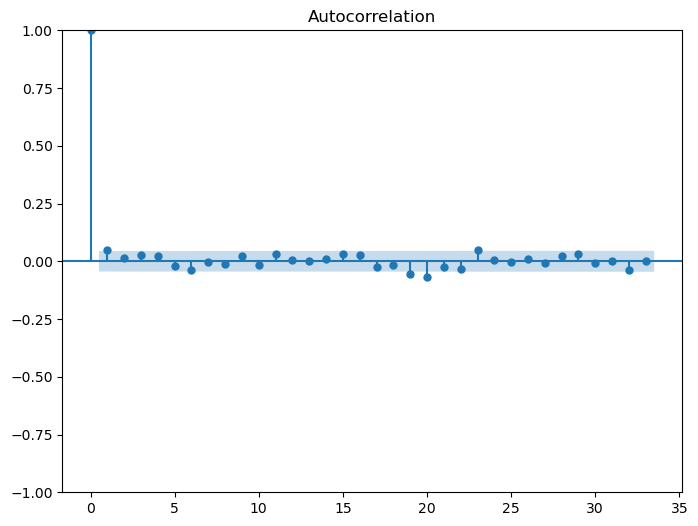

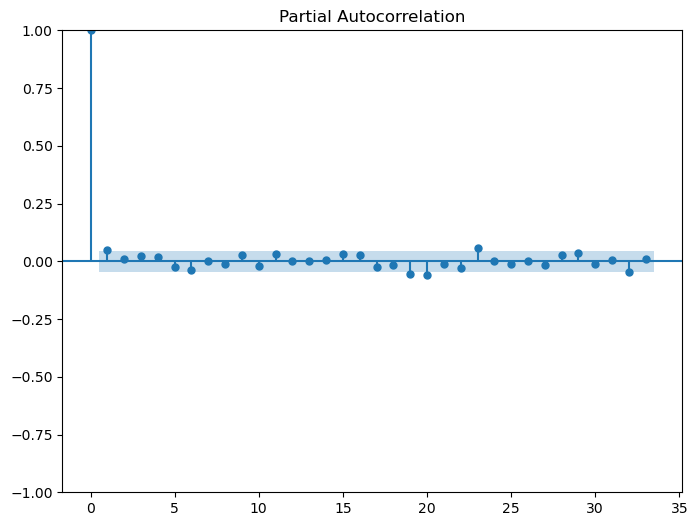

In [31]:
diff_acf=plot_acf(diff_val)
diff_pacf=plot_pacf(diff_val)

In [32]:
ADF_Test(diff_val)

ADF Test Statistics:  -42.011584029550704
P-value:  0.0
Number of lags:  0
Number of observations:  1956
Critical value 1% : -3.4336975984464764
Critical value 5% : -2.8630187704944223
Critical value 10% : -2.567557237266907


### Inference: The p-value has become lesser than 0.05, so the differenced log transformed values are stationary. It can be used to train the ARIMA model

## Splitting into training and testing data:

In [33]:
train_data,test_data=diff_val[1:int(len(diff_val)*0.9)],diff_val[int(len(diff_val)*0.9):]

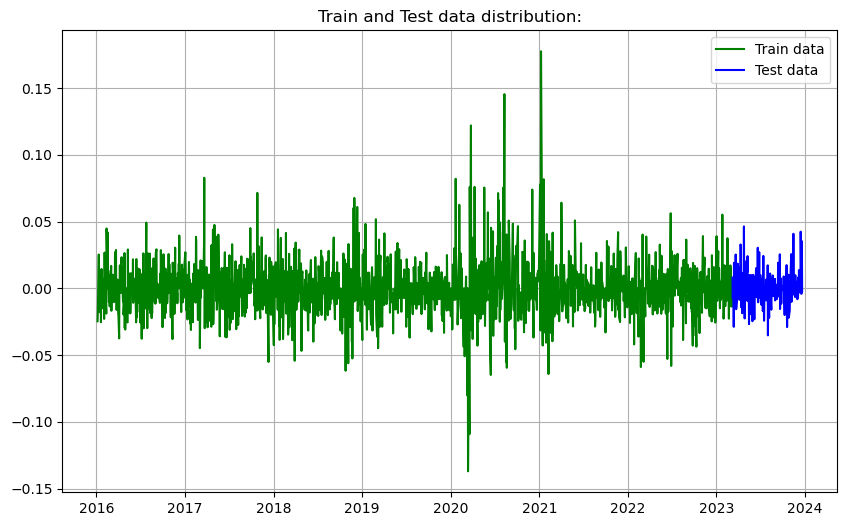

In [34]:

plt.figure(figsize=(10,6))
plt.title("Train and Test data distribution:")
plt.plot(train_data,color="green",label="Train data")
plt.plot(test_data,color="blue",label="Test data")
plt.legend()
plt.grid(True)
plt.show()

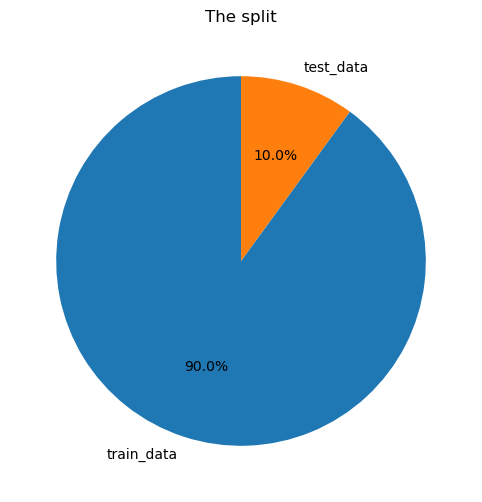

In [35]:
values=[len(train_data),len(test_data)]
labels=["train_data","test_data"]
plt.pie(values,labels=labels,autopct='%1.1f%%', startangle=90)
plt.title("The split")
plt.show()


In [36]:
!pip install pmdarima

In [37]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')


In [38]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,test='adf',max_p=3, max_q=3, m=1,d=None, seasonal=False,start_P=0, D=0,trace=True, error_action='ignore',suppress_warnings=True,stepwise=True)         
                     

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8710.493, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8713.765, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8713.609, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-8712.155, Time=0.51 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8712.682, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-8710.124, Time=0.97 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8711.812, Time=0.46 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 2.961 seconds


### Best values for parameters p,d and q according to auto-ARIMA are: 1,0 and 0 and there's no seasonality.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1760
Model:               SARIMAX(1, 0, 0)   Log Likelihood                4358.882
Date:                Fri, 05 Jan 2024   AIC                          -8713.765
Time:                        17:41:52   BIC                          -8702.819
Sample:                             0   HQIC                         -8709.719
                               - 1760                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0547      0.015      3.536      0.000       0.024       0.085
sigma2         0.0004    6.4e-06     64.524      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

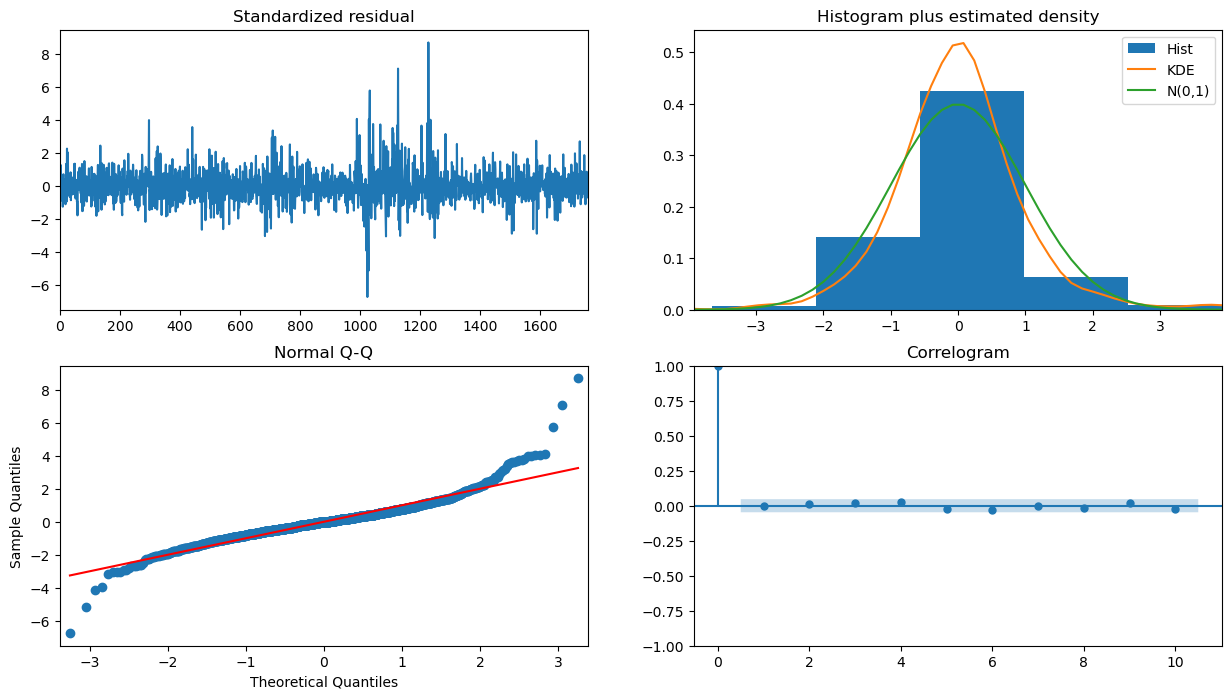

In [39]:
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [84]:
Final_ARIMA_model = ARIMA(train_data, order=(1,0,0)) 
fitted_model= Final_ARIMA_model.fit() 


### Making predictions on the testing data

In [85]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions=fitted_model.predict(start=start,end=end,typ='levels')
predictions.index=stocks.index[start:end+1]
print(predictions)


Date
2023-03-07    0.000044
2023-03-08    0.000109
2023-03-09    0.000112
2023-03-10    0.000112
2023-03-13    0.000112
                ...   
2023-12-13    0.000112
2023-12-14    0.000112
2023-12-15    0.000112
2023-12-18    0.000112
2023-12-19    0.000112
Name: predicted_mean, Length: 196, dtype: float64


<AxesSubplot:xlabel='Date'>

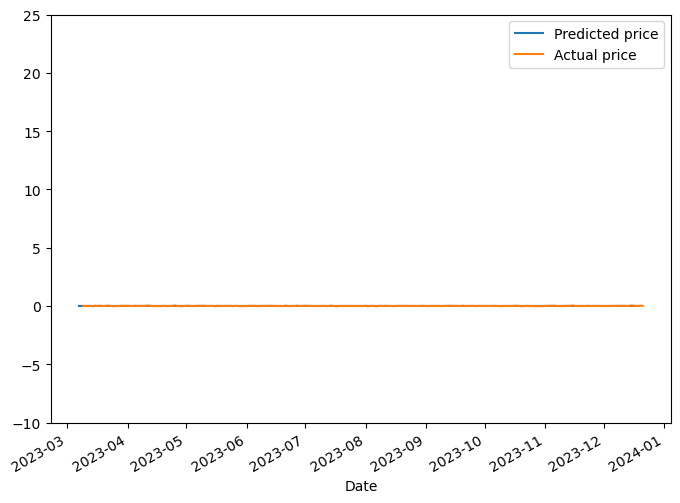

In [86]:
predictions.plot(legend=True,label='Predicted price')
plt.ylim(-10,25)
test_data.plot(legend=True,label='Actual price')


### Inference: The predicted price and the actual price are almost same.

In [87]:
print("Average price in the year 2023 according to the model:", predictions.mean())
print("Actual average price in the year 2023 :", test_data.mean())


Average price in the year 2023 according to the model: 0.00011206122736296587
Actual average price in the year 2023 : 0.0006509273853735455


<AxesSubplot:xlabel='Date'>

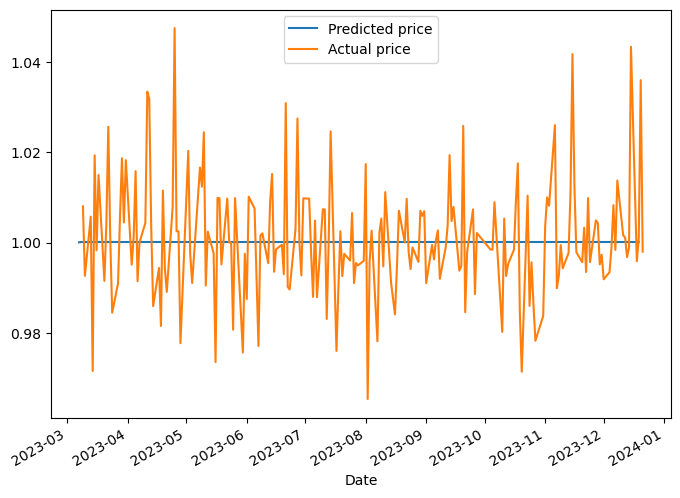

In [88]:
vals=np.exp(predictions)
test_vals=np.exp(test_data)
vals.plot(legend=True,label='Predicted price')
#plt.ylim(0,25)
test_vals.plot(legend=True,label='Actual price')

In [89]:
vals.mean()

1.0001120675184336

In [90]:
test_vals.mean()

1.0007373020881427

## MODEL EVALUATION

### Calculating Root Mean Squared Error(RMSE) of the model

In [91]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [92]:
mse=mean_squared_error(predictions,test_data)
rmse=sqrt(mse)
print("error in the model is:",rmse, "and the average value of the prediction is :",predictions.mean() )

error in the model is: 0.013118872345990655 and the average value of the prediction is : 0.00011206122736296587


### The error of the model is just 0.0131

## Retraining the model on the entire dataset

In [93]:
Final_ARIMA_model2 = ARIMA(log_val, order=(1,0,0)) 
fitted_model2= Final_ARIMA_model.fit() 


In [94]:
stocks.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-15,185800.0,192800.0,185200.0,192800.0,192800.0,1228522
2023-12-18,192800.0,193000.0,190000.0,192000.0,192000.0,482331
2023-12-19,191900.0,192900.0,190800.0,192200.0,192200.0,272670
2023-12-20,192700.0,199700.0,192600.0,199100.0,199100.0,961888
2023-12-21,0.0,0.0,0.0,198700.0,198700.0,0


## Predicting the future stock prices

### Predicting the stock prices for the next 30 days

In [95]:
future_dates=pd.date_range(start='2023-12-21',end='2024-1-20')
pred=fitted_model2.predict(start=len(log_val),end=len(log_val)+30)
pred.index=future_dates
pred

2023-12-21    0.000112
2023-12-22    0.000112
2023-12-23    0.000112
2023-12-24    0.000112
2023-12-25    0.000112
2023-12-26    0.000112
2023-12-27    0.000112
2023-12-28    0.000112
2023-12-29    0.000112
2023-12-30    0.000112
2023-12-31    0.000112
2024-01-01    0.000112
2024-01-02    0.000112
2024-01-03    0.000112
2024-01-04    0.000112
2024-01-05    0.000112
2024-01-06    0.000112
2024-01-07    0.000112
2024-01-08    0.000112
2024-01-09    0.000112
2024-01-10    0.000112
2024-01-11    0.000112
2024-01-12    0.000112
2024-01-13    0.000112
2024-01-14    0.000112
2024-01-15    0.000112
2024-01-16    0.000112
2024-01-17    0.000112
2024-01-18    0.000112
2024-01-19    0.000112
2024-01-20    0.000112
Freq: D, Name: predicted_mean, dtype: float64

###  Since, the model was trained on log transformed data, the predictions in log scale as well.
### Converting it to its original scale by taking exponential of the predicted values.

In [109]:
pred = np.exp(pred) + 0.001

In [110]:
pred

2023-12-21    2.722307
2023-12-22    2.722307
2023-12-23    2.722307
2023-12-24    2.722307
2023-12-25    2.722307
2023-12-26    2.722307
2023-12-27    2.722307
2023-12-28    2.722307
2023-12-29    2.722307
2023-12-30    2.722307
2023-12-31    2.722307
2024-01-01    2.722307
2024-01-02    2.722307
2024-01-03    2.722307
2024-01-04    2.722307
2024-01-05    2.722307
2024-01-06    2.722307
2024-01-07    2.722307
2024-01-08    2.722307
2024-01-09    2.722307
2024-01-10    2.722307
2024-01-11    2.722307
2024-01-12    2.722307
2024-01-13    2.722307
2024-01-14    2.722307
2024-01-15    2.722307
2024-01-16    2.722307
2024-01-17    2.722307
2024-01-18    2.722307
2024-01-19    2.722307
2024-01-20    2.722307
Freq: D, Name: predicted_mean, dtype: float64

### Adding the values to the previous value of the original dataset, to undo the differencing and get the original predicted value.

In [111]:
forecast_original = np.cumsum(pred) + stocks['Close'].iloc[-1]


In [112]:
print(forecast_original)

2023-12-21    198702.722307
2023-12-22    198705.444615
2023-12-23    198708.166922
2023-12-24    198710.889230
2023-12-25    198713.611537
2023-12-26    198716.333845
2023-12-27    198719.056152
2023-12-28    198721.778459
2023-12-29    198724.500767
2023-12-30    198727.223074
2023-12-31    198729.945382
2024-01-01    198732.667689
2024-01-02    198735.389997
2024-01-03    198738.112304
2024-01-04    198740.834611
2024-01-05    198743.556919
2024-01-06    198746.279226
2024-01-07    198749.001534
2024-01-08    198751.723841
2024-01-09    198754.446149
2024-01-10    198757.168456
2024-01-11    198759.890763
2024-01-12    198762.613071
2024-01-13    198765.335378
2024-01-14    198768.057686
2024-01-15    198770.779993
2024-01-16    198773.502301
2024-01-17    198776.224608
2024-01-18    198778.946915
2024-01-19    198781.669223
2024-01-20    198784.391530
Freq: D, Name: predicted_mean, dtype: float64


In [108]:
print(" average stock price for the next 30 days:",forecast_original.mean())

 average stock price for the next 30 days: 198716.0177990043


### The average stock price for the next 30 days in the year 2024 would be:198716.017 according to the model